In [17]:
# Importing the data
import pandas as pd
data = pd.read_csv('predictive_maintenance.csv')
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## Exploratory Data Analysis

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [20]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [26]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

#### Features like `UDI` and `Product Id` would not contribute anything to the target variables, so it is better to remove them

In [28]:
unwanted_cols = ['UDI', 'Product ID']
df2 = data.drop(columns=unwanted_cols)

#### Check for null values

In [30]:
data.isna().sum().sum()

np.int64(0)

#### Check for duplicate rows

In [21]:
duplicates = data.duplicated()
print(duplicates.sum())  

0


#### Data Visualization

In [38]:
categorical_cols = df2.select_dtypes(include=['object']).columns.tolist()
continuous_cols = df2.select_dtypes(include=['number']).columns.tolist()

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 1. Plotting Distribution of Continuous Features (e.g., histograms)
def plot_continuous_distribution(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)  # Histogram + KDE
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
        
# 2. Plotting Box Plot for Outliers in Continuous Features
def plot_boxplot(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
        plt.show()

# 3. Plotting Categorical Feature Distribution (e.g., bar charts)
def plot_categorical_distribution(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[col])
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

# 4. Plotting Correlation Heatmap for Continuous Features
def plot_correlation_heatmap(df, columns):
    corr = df[columns].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()


# 5. Scatter Plot to Visualize Relationship between Two Continuous Variables
def plot_scatter(df, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col])
    plt.title(f'Scatter Plot between {x_col} and {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()


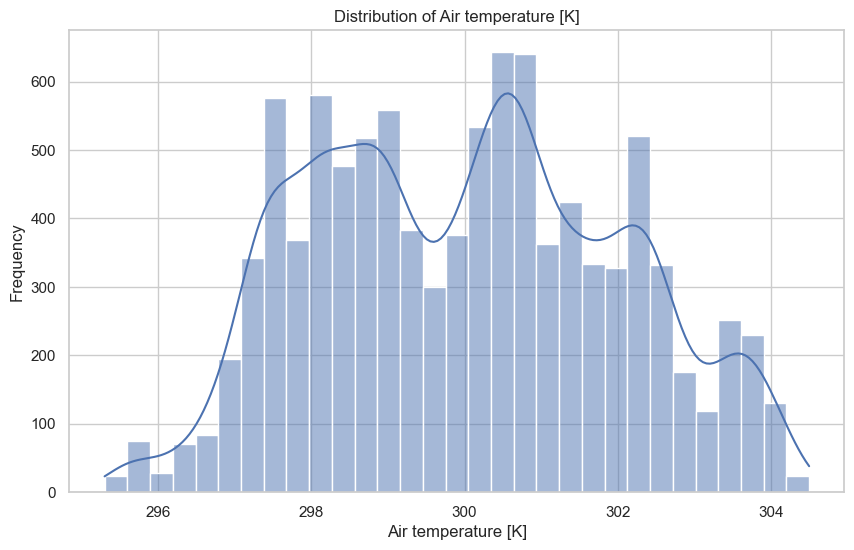

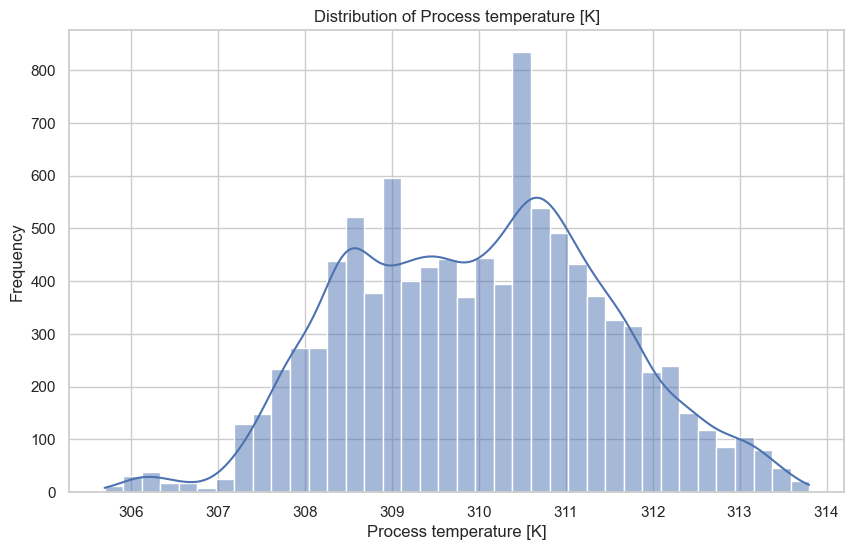

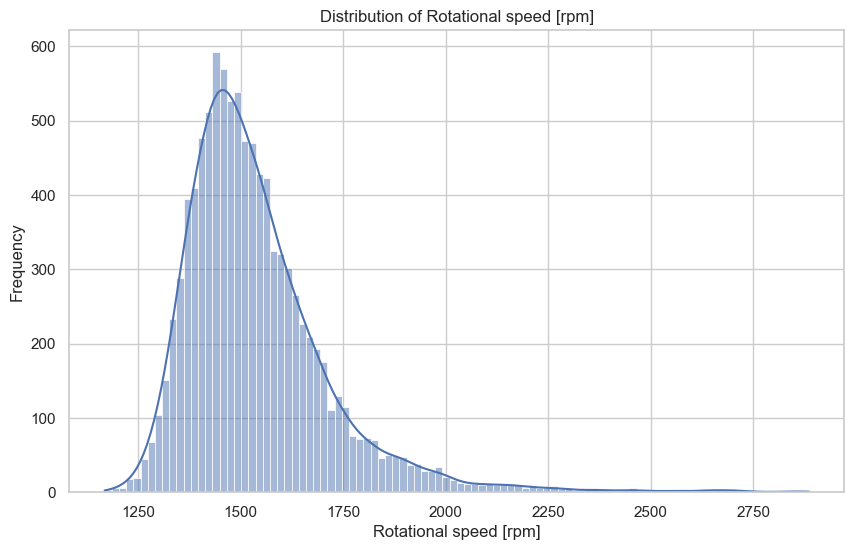

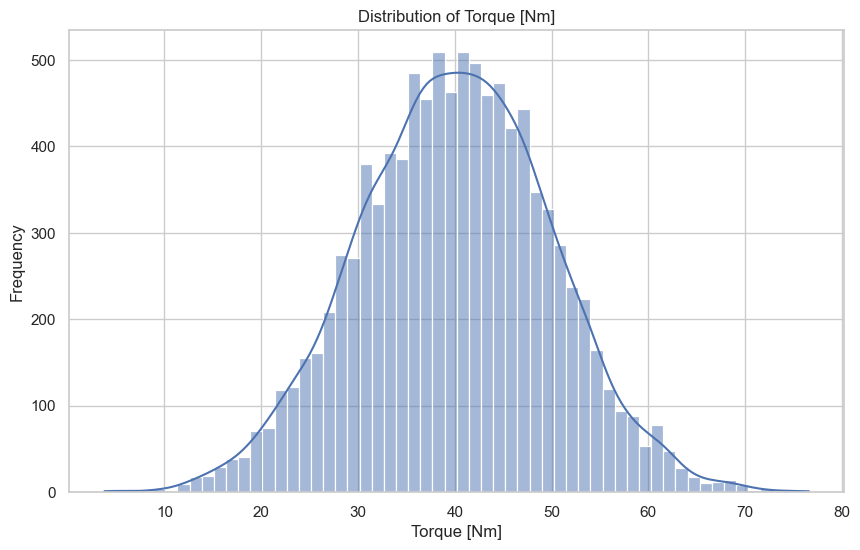

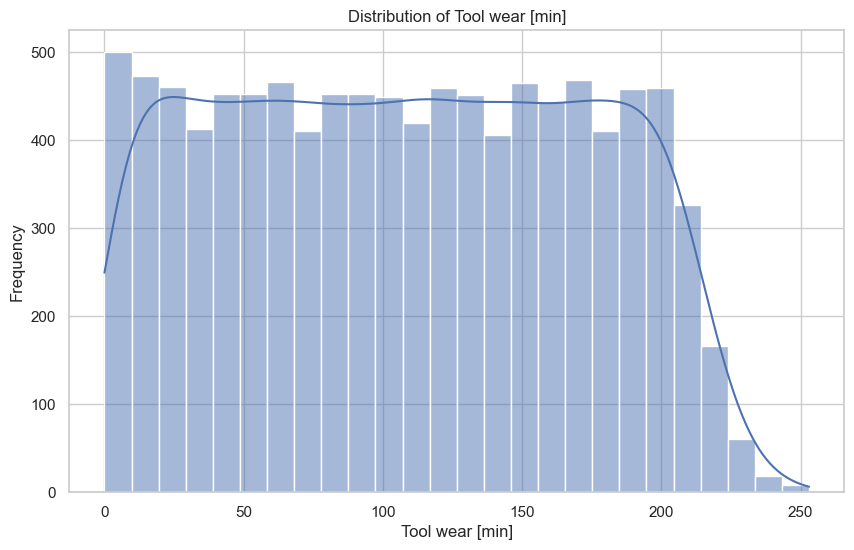

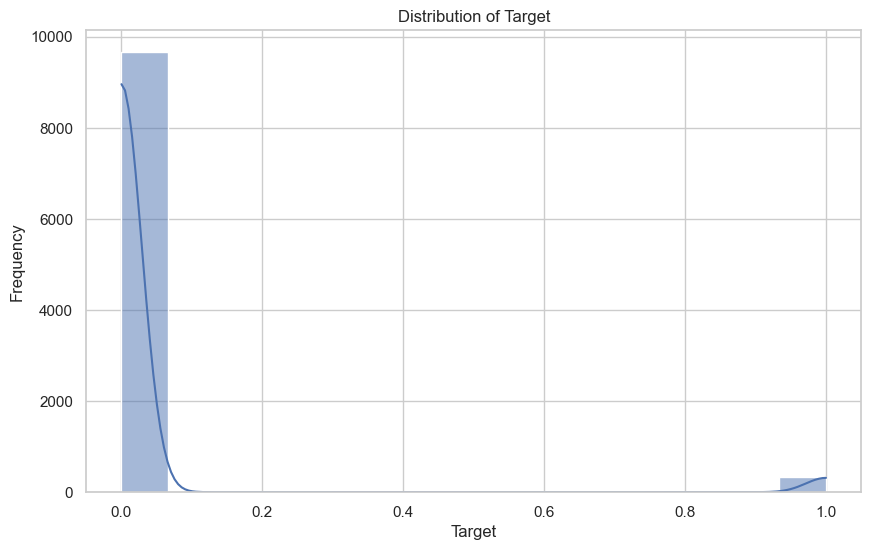

In [40]:
plot_continuous_distribution(df2, continuous_cols)

### Outlier detection

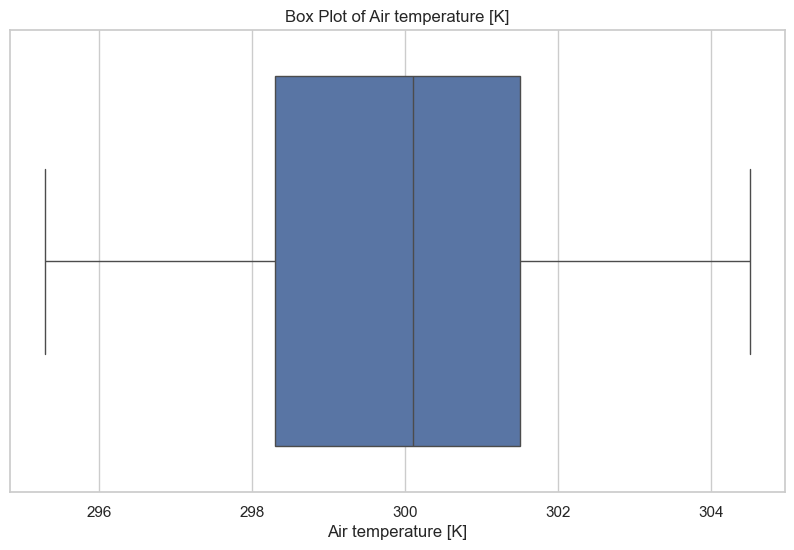

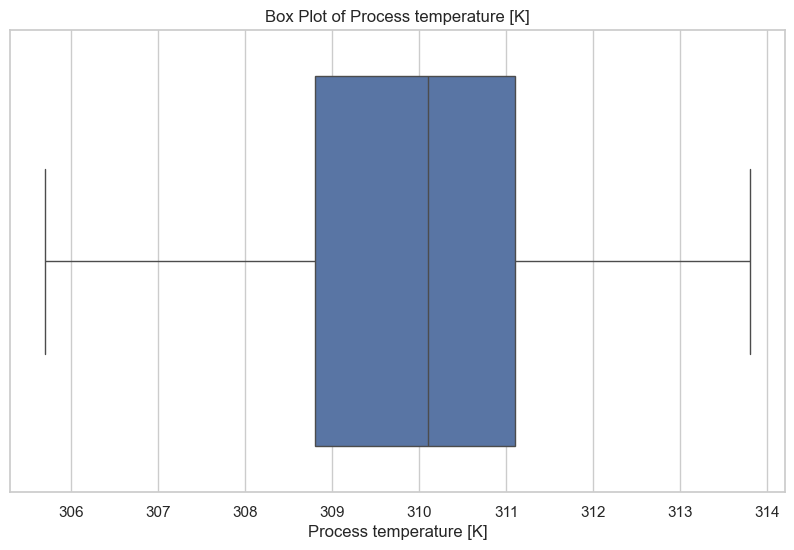

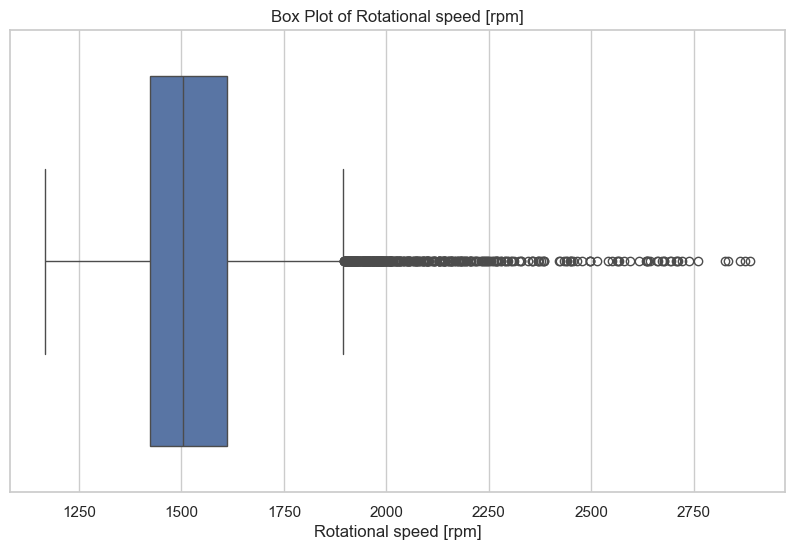

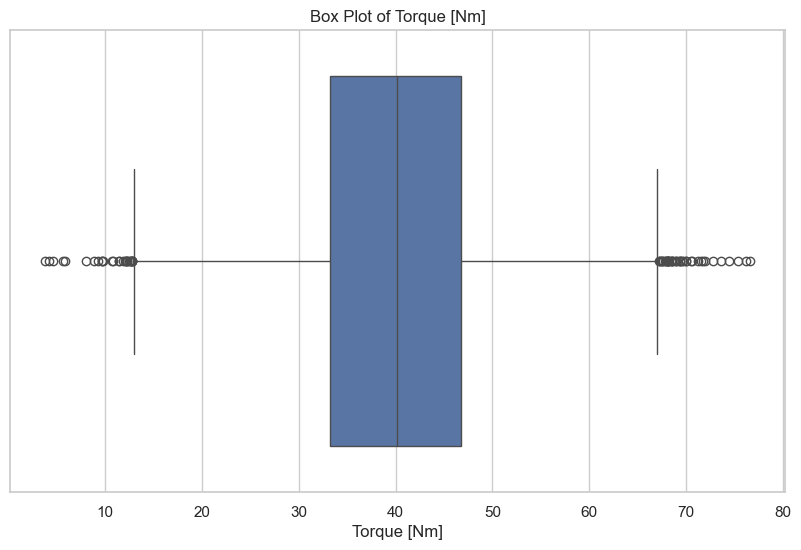

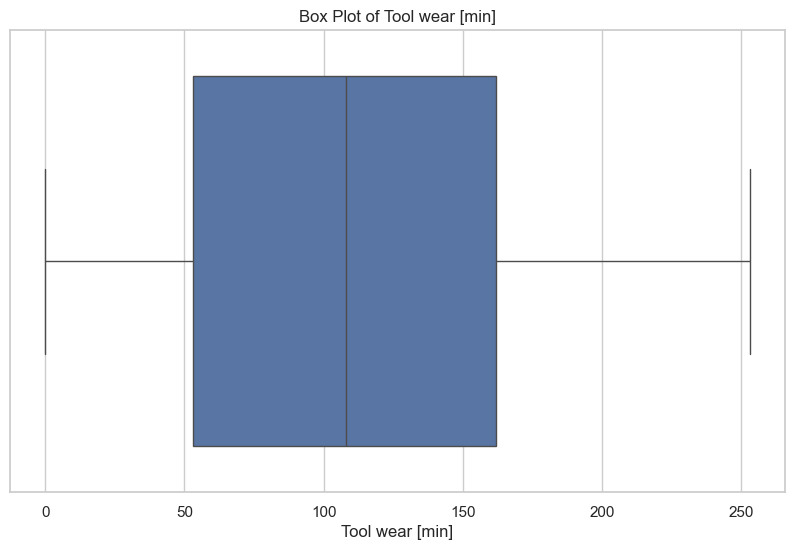

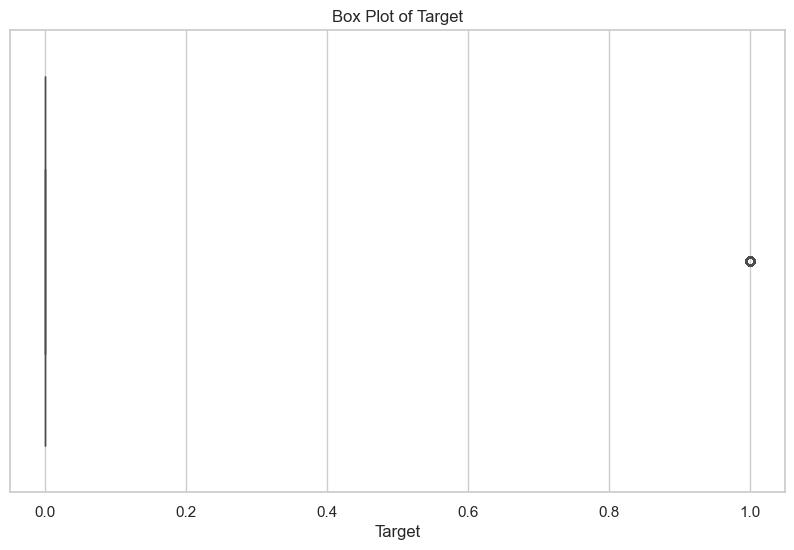

In [41]:
plot_boxplot(df2, continuous_cols)

#### By observing the box plots, we can see there are many outliers in the `Rotational speed [rpm]` and `Torque [Nm]`

#### Out Removal

In [45]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.73)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [48]:
outliers_cols = ['Rotational speed [rpm]', 'Torque [Nm]']
df3 = remove_outliers(df2, cols)

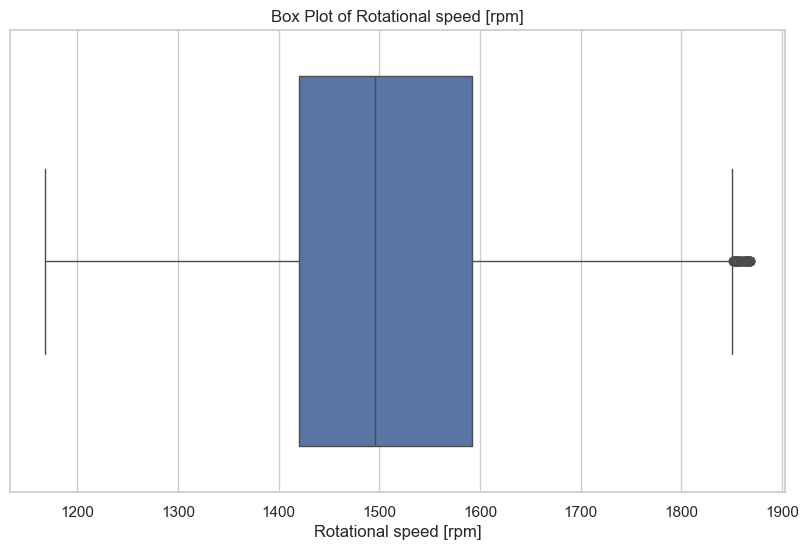

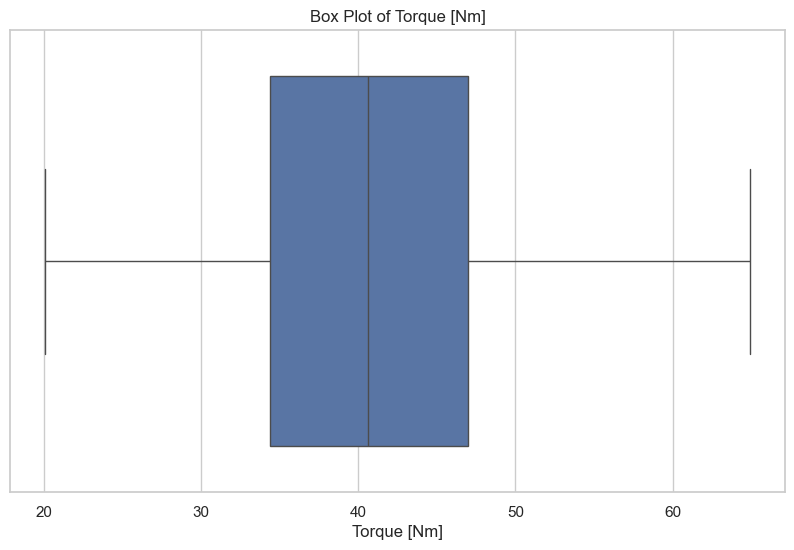

In [50]:
plot_boxplot(df3, outliers_cols)

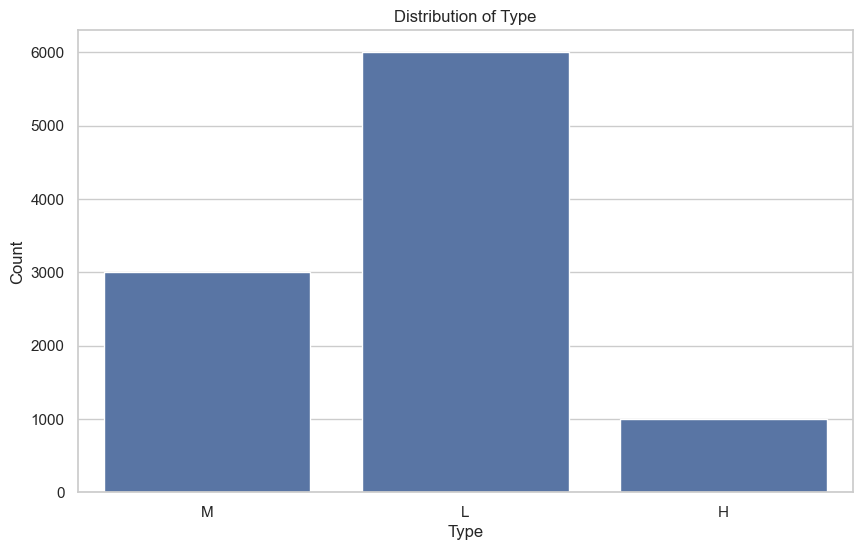

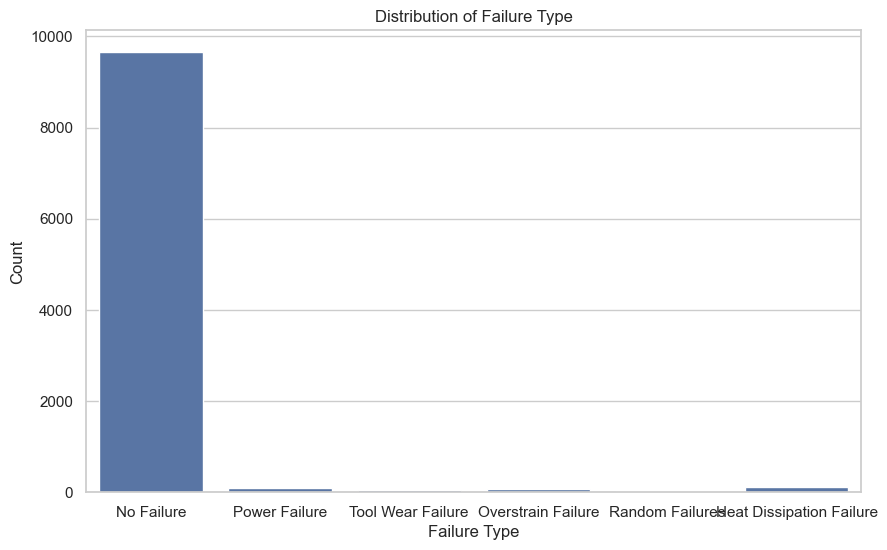

In [39]:
plot_categorical_distribution(df2, categorical_cols)

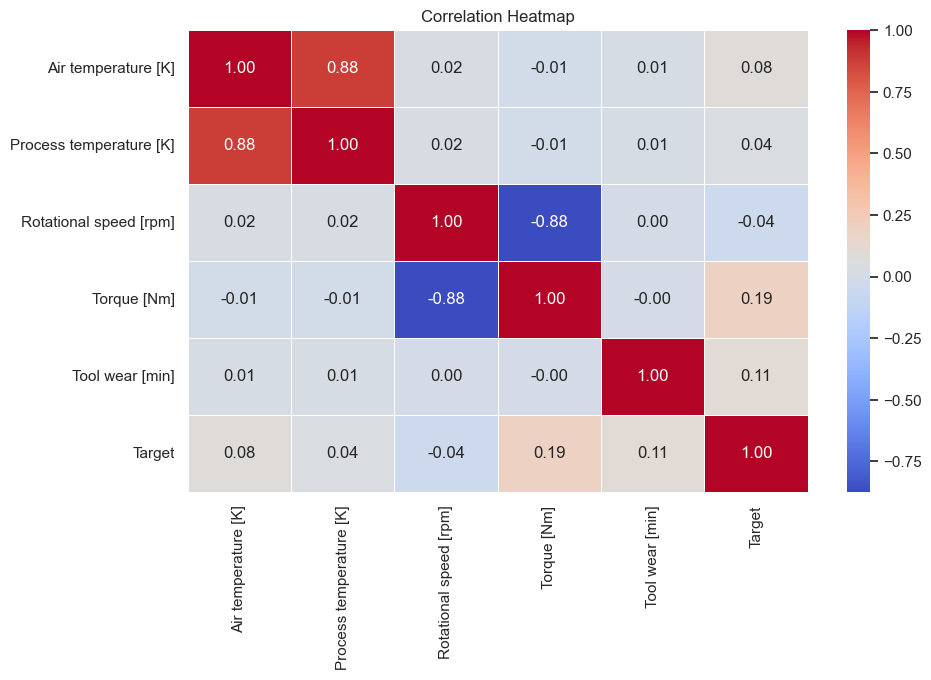

In [42]:
plot_correlation_heatmap(df2, continuous_cols)

#### The heatmap tells us there is a strong correlation between `{Air temperature[K]` and `Process temperature[K]`} and {`Rotational speed[rpm]` and `Torque[Nm]`}

#### Scatter Plot: `Air temperature [K]` vs `Process temperature [K]`

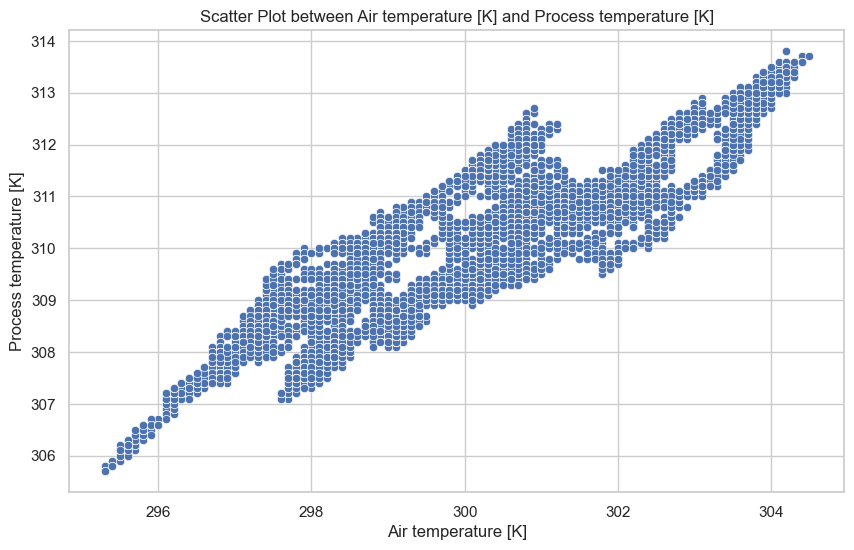

In [59]:
plot_scatter(df3, 'Air temperature [K]', 'Process temperature [K]')

#### Scatter Plot: `Rotational speed [rpm]` vs `Torque [Nm]`

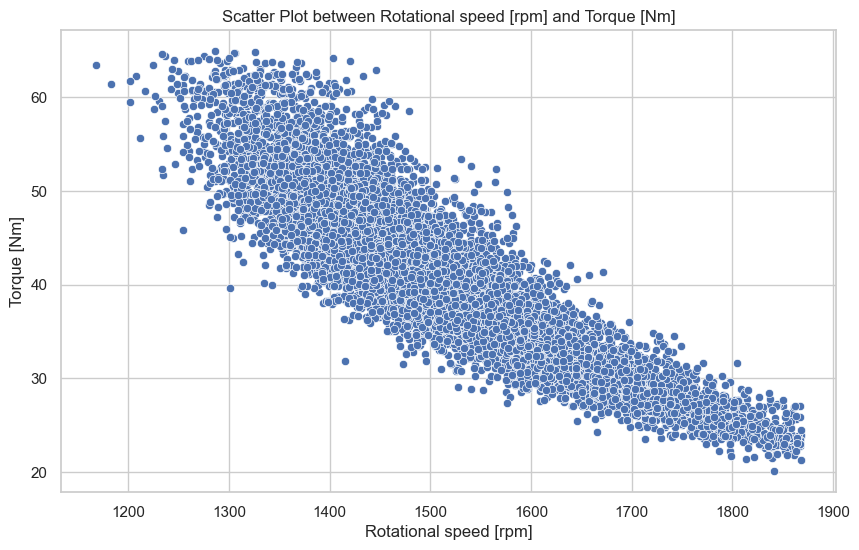

In [60]:
plot_scatter(df3, 'Rotational speed [rpm]', 'Torque [Nm]')

### Conclusion from EDA

- Outliers from **Rotational speed [rpm]** and **Torque [Nm]** were removed to ensure better data quality.  
- Found strong correlations between **Air temperature [K] & Process temperature [K]** and **Rotational speed [rpm] & Torque [Nm]**.  
- While **PCA** could reduce multicollinearity, we opted not to apply it due to the limited number of features.


In [62]:
X , y= df3.drop(columns=['Target', 'Failure Type']), df3['Target']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [75]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
ct = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), make_column_selector(dtype_include=object)),
    remainder = 'passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [76]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Logistic Regression (for Target)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratios = [0, 0.1, 0.5, 0.7, 0.9, 1]
scores = []

for i in C_values:
    for j in l1_ratios:
        lr = LogisticRegression(C=i, l1_ratio=j)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        scores.append([i, j, f1_score(y_test, y_pred, pos_label=1)])

df_scores=pd.DataFrame(scores, columns=['C', 'l1_ratio', 'f1_score'])
df_scores.sort_values('f1_score', ascending=False).iloc[0]

C           100.000000
l1_ratio      0.900000
f1_score      0.139535
Name: 40, dtype: float64

In [120]:
# Hyperparameter Tuning
best_lr = LogisticRegression(C=100, l1_ratio=0.9)
best_lr.fit(X_train, y_train)

LogisticRegression(C=100, l1_ratio=0.9)

## Support Vector Machine (Linear)

In [114]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
dfs = ['ovr', 'ovo']
ker = 'linear'
scores = []

for i in C_values:
    for j in dfs:
        svc = SVC(kernel='linear', C=i, decision_function_shape=j)
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)
        scores.append([i, j, f1_score(y_test, y_pred, pos_label=1)])

df_scores=pd.DataFrame(scores, columns=['C', 'decision_function_shape', 'f1_score'])
df_scores.sort_values('f1_score', ascending=False).iloc[0]

C                             100.0
decision_function_shape         ovr
f1_score                   0.139535
Name: 12, dtype: object

In [119]:
# Hyperparameter Tuning
best_svc_linear = SVC(kernel='linear', C=100, decision_function_shape='ovr')
best_svc_linear.fit(X_train, y_train)

SVC(C=100, kernel='linear')

## Support Vector Machine (rbf)

In [116]:
from sklearn.svm import SVC

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
dfs = ['ovr', 'ovo']
gamma = ['scale', 'auto'] 
kernel = 'rbf'
scores = []

for i in C_values:
    for j in dfs:
        for k in gamma:
            svc = SVC(kernel=kernel, C=i, decision_function_shape=j, gamma=k)
            svc.fit(X_train, y_train)
            y_pred = svc.predict(X_test)
            scores.append([i, j, k, f1_score(y_test, y_pred, pos_label=1)])

df_scores=pd.DataFrame(scores, columns=['C', 'decision_function_shape', 'gamma', 'f1_score'])
df_scores.sort_values('f1_score', ascending=False).iloc[0]

C                          0.0001
decision_function_shape       ovr
gamma                       scale
f1_score                      0.0
Name: 0, dtype: object

In [118]:
# Hyperparameter Tuning
best_svc_rbf = SVC(kernel='rbf', C=0.0001, decision_function_shape='ovr', gamma='scale')
best_svc_rbf.fit(X_train, y_train)

SVC(C=0.0001)

## Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

data = [np.arange(5,21), None]
max_depth = list(data[0]) + [data[1]] 
min_samples_split=[2,5,10,50]
min_samples_leaf=[1,5,10,20]
scores = []

for i in max_depth:
    for j in min_samples_split:
        for k in min_samples_leaf:
            dct = DecisionTreeClassifier(random_state=24, max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dct.fit(X_train, y_train)
            y_pred = dct.predict(X_test)
            scores.append([i, j, k, f1_score(y_test, y_pred, pos_label=1)])

df_scores = pd.DataFrame(scores, columns=['Max_Depth', 'Min_Samples_Split', 'Min_Samples_leaf', 'F1_Score'])
df_scores.sort_values('F1_Score', ascending=False).iloc[0]

Max_Depth            8.00000
Min_Samples_Split    5.00000
Min_Samples_leaf     1.00000
F1_Score             0.77037
Name: 52, dtype: float64

In [110]:
# Hyperparameter Tuning
best_dct = DecisionTreeClassifier(random_state=24, max_depth=8, min_samples_split=8, min_samples_leaf=1)
best_dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=8, random_state=24)

## Voting Classifier

In [121]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier([('lr', best_lr),
                           ('dtc', best_dct),
                           ('svcLinear', best_svc_linear),
                           ('svcRBF', best_svc_rbf),
                           ])
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, pos_label=1)

0.125

### Conclusion
**Decision Tree Classifier** has the highest f1_score of **0.77**, so we'll be using it for inferencing unlabelled data

## Inferencing

In [130]:
X_train, y_train = X, y
X_test = pd.read_csv('unlabelled_data.csv')
X_test = X_test.drop(columns=['UDI'])

In [131]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [132]:
final_dct = DecisionTreeClassifier(random_state=24, max_depth=8, min_samples_split=8, min_samples_leaf=1)
final_dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=8, random_state=24)

In [136]:
final_dct.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [137]:
y_pred = final_dct.predict(X_test)
X_test['Target'] = y_pred

In [138]:
X_test

,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,0.0,1.0,298.4,308.6,1554,42.8,0,0
1,1.0,0.0,298.2,308.7,1408,46.3,3,0
2,1.0,0.0,298.9,309.1,2870,4.6,143,0
3,1.0,0.0,298.8,308.9,1450,41.3,208,0
4,1.0,0.0,298.4,308.0,1471,48.0,215,0
5,1.0,0.0,298.2,308.2,1278,60.7,216,1
6,1.0,0.0,298.3,308.1,1412,52.3,218,1
7,0.0,0.0,298.2,308.4,1398,51.8,76,0
8,0.0,0.0,298.2,308.4,1680,34.6,82,0
9,1.0,0.0,298.2,308.1,1450,50.8,26,0
